In [523]:
import pandas as pd

In [525]:
df=pd.read_csv('dataset/train.csv')

In [527]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [529]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: >

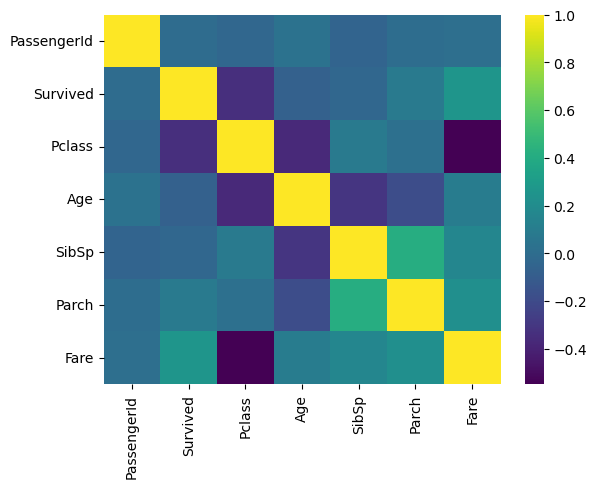

In [531]:
correlation= df.select_dtypes(include=['number']).corr()
import seaborn as sns
sns.heatmap(correlation, cmap='viridis')

In [533]:
correlation['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

In [535]:
from sklearn.model_selection import StratifiedShuffleSplit
splitter= StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index, test_index in splitter.split(df, df[['Survived','Pclass','Sex']]):
    strat_train=df.loc[train_index]
    strat_test=df.loc[test_index]




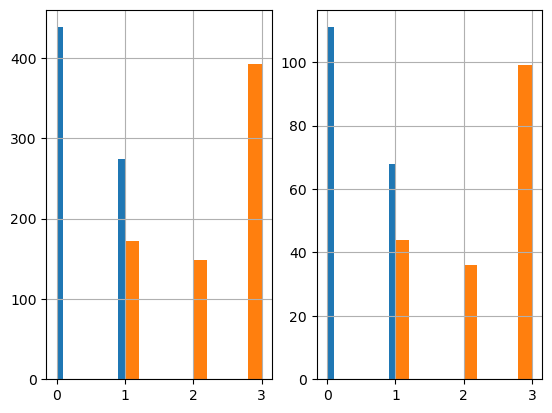

In [537]:
import matplotlib.pyplot as plt
plt.subplot(1,2,1)
strat_train['Survived'].hist()
strat_train['Pclass'].hist()


plt.subplot(1,2,2)
strat_test['Survived'].hist()
strat_test['Pclass'].hist()


plt.show()

In [539]:
strat_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 867 to 802
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          565 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        167 non-null    object 
 11  Embarked     710 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


In [554]:
# these are base classes that allow you to create custom estimators and transformers compatible with scikit-learn's pipelines.
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

class AgeImputer(BaseEstimator, TransformerMixin): 
    def fit(self, X, y=None):
        return self

    def transform(self,X):
         imputer= SimpleImputer(strategy='mean')
         X['Age']=imputer.fit_transform(X[['Age']])
         return X



In [556]:
# from sklearn.compose import make_column_transformer
# from sklearn.pipeline import Pipeline
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.preprocessing import FunctionTransformer
# # Mean imputation only to the 'Age' column
# num_pipeline = Pipeline([
#     ('imputer', SimpleImputer(strategy='mean'))
# ])

# # Handling categorical data for the Embarked and Sex columns
# cat_pipeline = make_column_transformer(
#     (OneHotEncoder(handle_unknown='ignore'), ['Embarked']),
#     (OneHotEncoder(handle_unknown='ignore'), ['Sex'])
# )

# def drop_columns(X):
#     return X.drop(['Embarked','Name','Ticket','Cabin','Sex'], axis =1, errors='ignore')

# feature_dropper=FunctionTransformer(drop_columns)

# preprocessing = make_column_transformer(
#     (num_pipeline, ['Age']),
#     (OneHotEncoder(handle_unknown='ignore'), ['Embarked']), 
#     (OneHotEncoder(handle_unknown='ignore'), ['Sex']),       
#     (feature_dropper, ['Embarked', 'Name', 'Ticket', 'Cabin', 'Sex']) 
# )
                           

In [566]:
from sklearn.preprocessing import OneHotEncoder

class FeatureEncoder(BaseEstimator, TransformerMixin):
    def fit(self, X):
        return self
    def transform (self, X):
        encoder= OneHotEncoder()
        matrix= encoder.fit_transform(X[['Embarked']]).toarray()
        column_names=['C','S','Q','N']

        for i in range (len(matrix.T)):
            X[column_names[i]]=matrix.T[i]

        matrix=encoder.fit_transform(X[['Sex']]).toarray()
        column_names=['Female', 'Male']

        for i in range (len(matrix.T)):
            X[column_names[i]]=matrix.T[i]
        return X
            

In [568]:
class FeatureDropper (BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X.drop(['Embarked','Name','Ticket','Cabin','Sex','N'], axis=1, errors='ignore')

from sklearn.preprocessing import FunctionTransformer

def drop_columns(X):
    return X.drop(['Embarked','Name','Ticket','Cabin','Sex'], axis =1, errors='ignore')

feature_dropper=FunctionTransformer(drop_columns)

In [570]:
from sklearn.pipeline import Pipeline

pipeline= Pipeline([('ageimputer',AgeImputer()),
                    ('featureencoder',FeatureEncoder()),
                    ('featuredropper', FeatureDropper())])


In [572]:
strat_train=pipeline.fit_transform(strat_train)

In [574]:
strat_train

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
867,868,0,1,31.0,0,0,50.4958,0.0,0.0,1.0,0.0,1.0
619,620,0,2,26.0,0,0,10.5000,0.0,0.0,1.0,0.0,1.0
50,51,0,3,7.0,4,1,39.6875,0.0,0.0,1.0,0.0,1.0
286,287,1,3,30.0,0,0,9.5000,0.0,0.0,1.0,0.0,1.0
834,835,0,3,18.0,0,0,8.3000,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
482,483,0,3,50.0,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
518,519,1,2,36.0,1,0,26.0000,0.0,0.0,1.0,1.0,0.0
54,55,0,1,65.0,0,1,61.9792,1.0,0.0,0.0,0.0,1.0
603,604,0,3,44.0,0,0,8.0500,0.0,0.0,1.0,0.0,1.0


In [576]:
strat_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 867 to 802
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Age          712 non-null    float64
 4   SibSp        712 non-null    int64  
 5   Parch        712 non-null    int64  
 6   Fare         712 non-null    float64
 7   C            712 non-null    float64
 8   S            712 non-null    float64
 9   Q            712 non-null    float64
 10  Female       712 non-null    float64
 11  Male         712 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 72.3 KB


In [578]:
from sklearn.preprocessing import StandardScaler

X= strat_train.drop(['Survived'], axis=1)
y= strat_train['Survived']
scaler= StandardScaler()
X_data= scaler.fit_transform(X)
# transformed into a numpy array to match scaled X which is now also a numpy.
y_data=y.to_numpy()

In [582]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf= RandomForestClassifier()

param_grid=[
    {'n_estimators':[10,100,200,500], 
     'max_depth':[None,5,10],
     'min_samples_split':[2,3,4]}
]

grid_search=GridSearchCV(clf, param_grid, cv=3, scoring='accuracy', return_train_score=True)
grid_search.fit(X_data, y_data)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [584]:
final_clf=grid_search.best_estimator_

In [586]:
final_clf

RandomForestClassifier(min_samples_split=3)

In [590]:
strat_test=pipeline.fit_transform(strat_test)

In [592]:
strat_test

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
659,660,0,1,58.00000,0,2,113.2750,1.0,0.0,0.0,0.0,1.0
119,120,0,3,2.00000,4,2,31.2750,0.0,0.0,1.0,1.0,0.0
875,876,1,3,15.00000,0,0,7.2250,1.0,0.0,0.0,1.0,0.0
67,68,0,3,19.00000,0,0,8.1583,0.0,0.0,1.0,0.0,1.0
644,645,1,3,0.75000,2,1,19.2583,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,1,3,33.00000,3,0,15.8500,0.0,0.0,1.0,1.0,0.0
687,688,0,3,19.00000,0,0,10.1708,0.0,0.0,1.0,0.0,1.0
538,539,0,3,29.44349,0,0,14.5000,0.0,0.0,1.0,0.0,1.0
279,280,1,3,35.00000,1,1,20.2500,0.0,0.0,1.0,1.0,0.0


In [594]:
X_test= strat_test.drop(['Survived'], axis=1)
y_test=strat_test['Survived']

scaler= StandardScaler()
X_data_test= scaler.fit_transform(X_test)
y_data_test=y_test.to_numpy()

In [596]:
final_clf.score(X_data_test, y_data_test)

0.8156424581005587

In [600]:
df= pipeline.fit_transform(df)

In [602]:
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
0,1,0,3,22.000000,1,0,7.2500,0.0,0.0,1.0,0.0,1.0
1,2,1,1,38.000000,1,0,71.2833,1.0,0.0,0.0,1.0,0.0
2,3,1,3,26.000000,0,0,7.9250,0.0,0.0,1.0,1.0,0.0
3,4,1,1,35.000000,1,0,53.1000,0.0,0.0,1.0,1.0,0.0
4,5,0,3,35.000000,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,0.0,0.0,1.0,0.0,1.0
887,888,1,1,19.000000,0,0,30.0000,0.0,0.0,1.0,1.0,0.0
888,889,0,3,29.699118,1,2,23.4500,0.0,0.0,1.0,1.0,0.0
889,890,1,1,26.000000,0,0,30.0000,1.0,0.0,0.0,0.0,1.0


In [604]:
X_final= df.drop(['Survived'], axis=1)
y_final=df['Survived']

scaler= StandardScaler()
X_data_final= scaler.fit_transform(X_final)
y_data_final=y_final.to_numpy()

In [606]:
prod_clf= RandomForestClassifier()

param_grid=[
    {'n_estimators':[10,100,200,500], 
     'max_depth':[None,5,10],
     'min_samples_split':[2,3,4]}
]

grid_search=GridSearchCV(prod_clf, param_grid, cv=3, scoring='accuracy', return_train_score=True)
grid_search.fit(X_data_final, y_data_final)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [608]:
prod_final_clf=grid_search.best_estimator_

In [610]:
prod_final_clf

RandomForestClassifier(max_depth=5, min_samples_split=3)

In [612]:
titanic_test_data=pd.read_csv('dataset/test.csv')

In [616]:
final_test_data=pipeline.fit_transform(titanic_test_data)

In [618]:
final_test_data

,PassengerId,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
0,892,3,34.50000,0,0,7.8292,0.0,1.0,0.0,0.0,1.0
1,893,3,47.00000,1,0,7.0000,0.0,0.0,1.0,1.0,0.0
2,894,2,62.00000,0,0,9.6875,0.0,1.0,0.0,0.0,1.0
3,895,3,27.00000,0,0,8.6625,0.0,0.0,1.0,0.0,1.0
4,896,3,22.00000,1,1,12.2875,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,30.27259,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
414,1306,1,39.00000,0,0,108.9000,1.0,0.0,0.0,1.0,0.0
415,1307,3,38.50000,0,0,7.2500,0.0,0.0,1.0,0.0,1.0
416,1308,3,30.27259,0,0,8.0500,0.0,0.0,1.0,0.0,1.0


In [622]:
X_final_test=final_test_data
X_final_test=X_final_test.ffill()
scaler=StandardScaler()
X_data_final_test=scaler.fit_transform(X_final_test)


In [624]:
predictions= prod_final_clf.predict(X_data_final_test)

In [626]:
predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [630]:
final_df=pd.DataFrame(titanic_test_data['PassengerId'])

In [632]:
final_df['Survived']=predictions
final_df.to_csv('dataset/predictions.csv', index=False)

In [634]:
final_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
